In [1]:
!pip install pandas

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
url= "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_no_subindustry.csv"
df= pd.read_csv(url)

In [32]:
print(df)

    Symbol              Security             GICS_Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                          hq    included      Founded  
0      Saint Paul, Minnesota  09.08.1976         1902  
1       Milwaukee, Wisconsin  26.07.2017         1916  
2    North Chicago, Illinois  31.03.1964         1888  
3    North Chicago, Illinois  31.12.2012  2013 (1888)  

In [37]:
# question 1
df['included']= pd.to_datetime(df['included'], dayfirst=True, errors='coerce') 
missing_dates = df['included'].isna().sum()
print(df)
print(missing_dates)

    Symbol              Security             GICS_Sector  \
0      MMM                    3M             Industrials   
1      AOS           A. O. Smith             Industrials   
2      ABT                Abbott             Health Care   
3     ABBV                AbbVie             Health Care   
4     ABMD               Abiomed             Health Care   
..     ...                   ...                     ...   
498    YUM           Yum! Brands  Consumer Discretionary   
499   ZBRA    Zebra Technologies  Information Technology   
500    ZBH         Zimmer Biomet             Health Care   
501   ZION  Zions Bancorporation              Financials   
502    ZTS                Zoetis             Health Care   

                          hq   included      Founded  
0      Saint Paul, Minnesota 1976-08-09         1902  
1       Milwaukee, Wisconsin 2017-07-26         1916  
2    North Chicago, Illinois 1964-03-31         1888  
3    North Chicago, Illinois 2012-12-31  2013 (1888)  
4   

In [42]:
#second question
df = df.dropna(subset=['included'])
df['age'] = (pd.Timestamp.now() - df['included']).dt.days / 365.25
oldest =  df.loc[df['age'].idxmax()]
youngest = df.loc[df['age'].idxmin()]
avg = df['age'].mean()
print(oldest)
print(youngest)
print(avg)

Symbol                          MO
Security                    Altria
GICS_Sector       Consumer Staples
hq              Richmond, Virginia
included       1957-03-04 00:00:00
Founded                       1985
age                      67.770021
Name: 25, dtype: object
Symbol                        ACGL
Security        Arch Capital Group
GICS_Sector             Financials
hq               Hamilton, Bermuda
included       2022-11-01 00:00:00
Founded                       1995
age                       2.108145
Name: 48, dtype: object
23.506368511707326


GICS_Sector
Information Technology    68
Industrials               66
Health Care               60
Financials                55
Consumer Discretionary    52
Consumer Staples          33
Real Estate               29
Materials                 26
Communication Services    22
Utilities                 22
Energy                    22
Name: count, dtype: int64


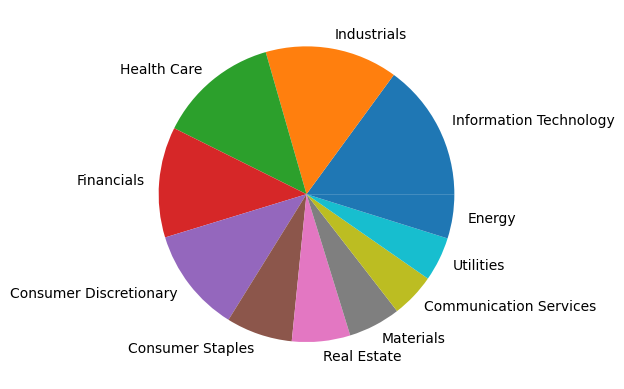

In [43]:
#third question
dist_sectors= df["GICS_Sector"].value_counts()
plt.pie(dist_sectors, labels=dist_sectors.index)
print(dist_sectors)


In [49]:
# question 4
# df["hq_states"] = df['hq'].str.split(",").pop()
# print(df)
# df["hq_states"]= df['hq'].str.extract(r',\s*([A-Z]{2})$')
df["hq_states"]= df['hq'].str.split(",")[-1]
# 65407278
print(df)
states_count=states.value_counts()
print(states )

KeyError: -1

In [54]:
# question 5
url2= "https://ies-fsv.s3.eu-central-1.amazonaws.com/companies/companies_subindustry.csv"
df2= pd.read_csv(url2)
merged = pd.merge(df, df2, on='Symbol',how="inner")
subindustry_dist= merged['subindustry'].value_counts()
print(subindustry_dist)

subindustry
Health Care Equipment     18
Industrial Machinery      14
Application Software      13
Packaged Foods & Meats    12
Semiconductors            11
                          ..
Consumer Electronics       1
Leisure Products           1
Advertising                1
Food Retail                1
Broadcasting               1
Name: count, Length: 120, dtype: int64


In [78]:
os.getcwd()
path= '/Users/albina.makisheva/Downloads/data'
data = {}
for file in os.listdir(path):
    if file.endswith('.csv'):
        ticker = file.replace('.csv', '')   
        data[ticker] = pd.read_csv(os.path.join(path, file))

print(data)

{'DPZ':             Date     Open     High      Low    Close  Volume  Dividends  \
0     2017-01-03  146.870  147.046  144.140  146.077  797600        0.0   
1     2017-01-04  146.123  150.662  145.791  150.348  679400        0.0   
2     2017-01-05  150.311  151.280  149.066  150.145  482100        0.0   
3     2017-01-06  150.468  151.649  149.601  150.809  548500        0.0   
4     2017-01-09  150.662  152.506  150.440  151.750  478600        0.0   
...          ...      ...      ...      ...      ...     ...        ...   
1505  2022-12-23  343.012  345.931  338.765  344.642  325500        0.0   
1506  2022-12-27  343.695  346.516  339.234  345.989  303000        0.0   
1507  2022-12-28  345.911  347.297  336.207  336.236  306900        0.0   
1508  2022-12-29  338.179  344.828  336.832  341.499  273800        0.0   
1509  2022-12-30  338.609  338.609  333.444  338.179  288100        0.0   

      Stock Splits  
0              0.0  
1              0.0  
2              0.0  
3      

In [85]:
# question 1
no_diff = []
for i, df in data.items():
    if (df['High'] == df['Low']).all():
        no_diff.append(i)
print(no_diff)

[]


In [80]:
# question 3
log_returns = {}
for ticker, df in data.items():
    df['log_of_return'] = np.log(df['Close'] / df['Close'].shift(1))
    log_returns[ticker] = {
        "min": df['log_of_return'].min(),
        "max": df['log_of_return'].max(),
        "mean": df['log_of_return'].mean(),
        "median": df['log_of_return'].median()
    }
returns_dataframe = pd.DataFrame(log_returns).T
print(returns_dataframe)


           min       max      mean    median
DPZ  -0.106259  0.227939  0.000556  0.000881
MOS  -0.321760  0.159255  0.000306  0.000700
UPS  -0.092277  0.134320  0.000395  0.000440
SEDG -0.260271  0.224078  0.002032  0.000920
WMT  -0.120769  0.110717  0.000558  0.000652


In [84]:
# question 4
highest_gain_loss = {}
for ticker, df in data.items():
    max_gain_date = df.loc[df['log_of_return'].idxmax(), 'Date']
    max_loss_date = df.loc[df['log_of_return'].idxmin(), 'Date']
    highest_gain_loss[ticker] = {"max_gain_date": max_gain_date, "max_loss_date": max_loss_date}
gain_loss_df = pd.DataFrame(highest_gain_loss).T
print(gain_loss_df)

KeyError: 'Date'

In [81]:
# question 5
avg_week_volume = {}
for ticker, df in data.items():
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    weekly_volume = df['Volume'].resample('W').mean()
    avg_week_volume[ticker] = weekly_volume.mean()
print(avg_week_volume)

{'DPZ': 732777.4600638978, 'MOS': 5062973.865814696, 'UPS': 3346773.1469648564, 'SEDG': 987423.7380191693, 'WMT': 24877349.376996804}


In [82]:
# question7
for ticker, df in data.items():
    df['Volume_Class'] = pd.qcut(df['Volume'], 3, labels=["Low", "Medium", "High"])
print(data)

{'DPZ':                Open     High      Low    Close  Volume  Dividends  \
Date                                                                
2017-01-03  146.870  147.046  144.140  146.077  797600        0.0   
2017-01-04  146.123  150.662  145.791  150.348  679400        0.0   
2017-01-05  150.311  151.280  149.066  150.145  482100        0.0   
2017-01-06  150.468  151.649  149.601  150.809  548500        0.0   
2017-01-09  150.662  152.506  150.440  151.750  478600        0.0   
...             ...      ...      ...      ...     ...        ...   
2022-12-23  343.012  345.931  338.765  344.642  325500        0.0   
2022-12-27  343.695  346.516  339.234  345.989  303000        0.0   
2022-12-28  345.911  347.297  336.207  336.236  306900        0.0   
2022-12-29  338.179  344.828  336.832  341.499  273800        0.0   
2022-12-30  338.609  338.609  333.444  338.179  288100        0.0   

            Stock Splits  log_of_return Volume_Class  
Date                                   